# Bloc IA : WS3
## Classification avec `python` ([`scipy`](https://www.scipy.org/), [`scikit-learn`](https://scikit-learn.org/)) 


|Auteur|Centre|Modification|
|---|---|---|
|M. A. BENATIA|Rouen|2024/07/02|

# Classification des Biens Immobiliers - Prédiction des Ventes dans les 6 Mois

## 1. Introduction
Dans ce notebook, nous allons développer un modèle de classification pour prédire si un bien immobilier sera vendu dans les 6 mois. Nous utiliserons plusieurs modèles de classification et comparerons leurs performances.



## 2. Chargement et Préparation des Données

### 2.1 Importation des données

In [1]:
import pandas as pd  # importe la bibliothèque pandas pour gérer des données sous forme de tableaux
import numpy as np  # importe numpy pour faire des calculs numériques
import matplotlib.pyplot as plt  # importe matplotlib pour créer des graphiques
import seaborn as sns  # importe seaborn pour faire des visualisations statistiques

from sklearn.model_selection import train_test_split  # importe la fonction pour diviser les données en train et test
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # importe les outils pour normaliser et encoder les données
from sklearn.compose import ColumnTransformer  # permet d'appliquer différents traitements selon les types de colonnes
from sklearn.pipeline import Pipeline  # permet de créer une chaîne d'étapes de traitement et de modèle
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve  # importe les métriques pour évaluer les modèles

from sklearn.linear_model import Perceptron, LogisticRegression  # importe les modèles perceptron et régression logistique
from sklearn.svm import SVC  # importe le modèle machine à vecteurs de support
from sklearn.neighbors import KNeighborsClassifier  # importe le modèle des k plus proches voisins
from sklearn.naive_bayes import GaussianNB  # importe le modèle bayésien naïf gaussien


**Métrique**

Une métrique est une mesure quantitative utilisée pour évaluer la performance d'un modèle. Exemples courants en classification binaire :
- Accuracy = (TP + TN) / (TP + TN + FP + FN)
- Precision = TP / (TP + FP)
- Recall (Rappel) = TP / (TP + FN)
- F1-score = 2 * (Precision * Recall) / (Precision + Recall)
- AUC-ROC = aire sous la courbe ROC (capacité à discriminer les classes)

Le choix de la métrique dépend du coût des erreurs (faux positifs vs faux négatifs) et des objectifs du modèle.

Vu plus bas

### 2.2 Chargement des données

In [ ]:
# Charger le dataset
housing = pd.read_csv('housing6month.csv')

# Afficher les premières lignes du dataset
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Sold6M
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1


## Préparation des Données
### 1. Gestion des valeurs manquantes

In [3]:
# Vérifier les valeurs manquantes
housing.isnull().sum()

# Imputer les valeurs manquantes pour les variables numériques avec la médiane
from sklearn.impute import SimpleImputer  # importe l'outil qui permet de remplacer les valeurs manquantes
imputer = SimpleImputer(strategy="median")  # crée un imputer qui remplacera chaque valeur manquante par la médiane de sa colonne

# Sélection des colonnes numériques
## A compléter :
housing_num = housing.select_dtypes(include=['float64', 'int64'])  # sélectionne uniquement les colonnes numériques du dataset
imputer.fit(housing_num)  # entraîne l'imputer pour apprendre comment remplacer les valeurs manquantes dans les données numériques
# imputer est un objet chargé de remplacer les valeurs manquantes dans un dataset

# Remplacement des valeurs manquantes
housing_num_imputed = pd.DataFrame(imputer.transform(housing_num), columns=housing_num.columns)

# Vérifier s'il reste des valeurs manquantes
housing_num_imputed.isnull().sum()

# longitude             0
# latitude              0
# housing_median_age    0
# total_rooms           0
# total_bedrooms        0
# population            0
# households            0
# median_income         0
# median_house_value    0
# Sold6M                0
# dtype: int64


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
Sold6M                0
dtype: int64

### 2. Encodage des variables catégorielles

In [9]:
# Sélection des colonnes catégorielles
housing_cat = housing.select_dtypes(include=[object])

# Encodage one-hot des variables catégorielles

cat_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)  # crée un encodeur onehot qui transforme les catégories en colonnes binaires et ignore les valeurs inconnues
housing_cat_encoded = pd.DataFrame(  # crée un dataframe pandas avec les données encodées
    cat_encoder.fit_transform(housing_cat),  # entraîne l'encodeur sur les données catégorielles puis les transforme
    columns=cat_encoder.get_feature_names_out(housing_cat.columns)  # utilise les noms de colonnes générés par l'encodeur
)
# Un OneHotEncoder est un outil de scikit-learn qui convertit des valeurs non numériques (comme des mots) en variables numériques.

# Vérification du résultat de l'encodage
housing_cat_encoded.head()


,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


### 3. Normalization des données 

In [10]:
# Normalisation des colonnes numériques
scaler = StandardScaler()  # crée un outil pour normaliser les données numériques
housing_num_scaled = pd.DataFrame(scaler.fit_transform(housing_num_imputed), columns=housing_num_imputed.columns)  # normalise les colonnes numériques et les remet en dataframe

# Vérification de la normalisation
housing_num_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Sold6M
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,0.362909
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,-2.755511
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,0.362909
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,0.362909
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,0.362909


### 4. Assemblage des données préparées


In [11]:
# Concatenation des colonnes numériques normalisées et des colonnes catégorielles encodées
housing_prepared = pd.concat([housing_num_scaled, housing_cat_encoded], axis=1)  # fusionne les données numériques normalisées avec les données catégorielles encodées
housing_prepared["Sold6M"] = housing["Sold6M"]  # ajoute la colonne cible au dataset préparé
# Vérification des données préparées
housing_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Sold6M,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,1,0.0,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,0,0.0,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,1,0.0,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,1,0.0,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,1,0.0,0.0,0.0,1.0,0.0


### 5. Séparation des caractéristiques (X) et de la cible (y)

In [12]:
# Séparation des caractéristiques et de la cible
## A compléter :
X = housing_prepared.drop("Sold6M", axis=1)   # sélectionne toutes les colonnes sauf la cible
y = housing_prepared["Sold6M"]  # sélectionne la colonne cible

# Vérification des dimensions
print(X.shape)  # affiche la taille de X (lignes, colonnes)
print(y.shape)  # affiche la taille de y (lignes,)

(20640, 14)
(20640,)


14 -> ça va être le nombre de colonne

Notre X ça va être toutes les données sauf celle qu'on veut prédire donc sans le Sold6M

À ce stade, nous avons chargé et préparé notre dataset housing6month.csv pour l'analyse. Nous avons imputé les valeurs manquantes, encodé les variables catégorielles et normalisé les variables numériques. Les données sont maintenant prêtes pour la phase de modélisation et de classification.

## Exploration et Visualisation des Données

### 1. Analyse des Statistiques Descriptives

Avant de plonger dans la visualisation des données, examinons les statistiques descriptives pour obtenir une première idée des distributions des variables.

In [13]:
housing.describe()  # affiche les statistiques descriptives des données originales


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Sold6M
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.883624
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.320683
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,1.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000


**Question :** Quels sont les principales informations que vous pouvez tirer des statistiques descriptives ? Identifiez les variables qui semblent avoir des valeurs aberrantes.

### 2. Visualisation des Variables Numériques
Nous commencerons par visualiser les distributions des variables numériques pour mieux comprendre leurs comportements.

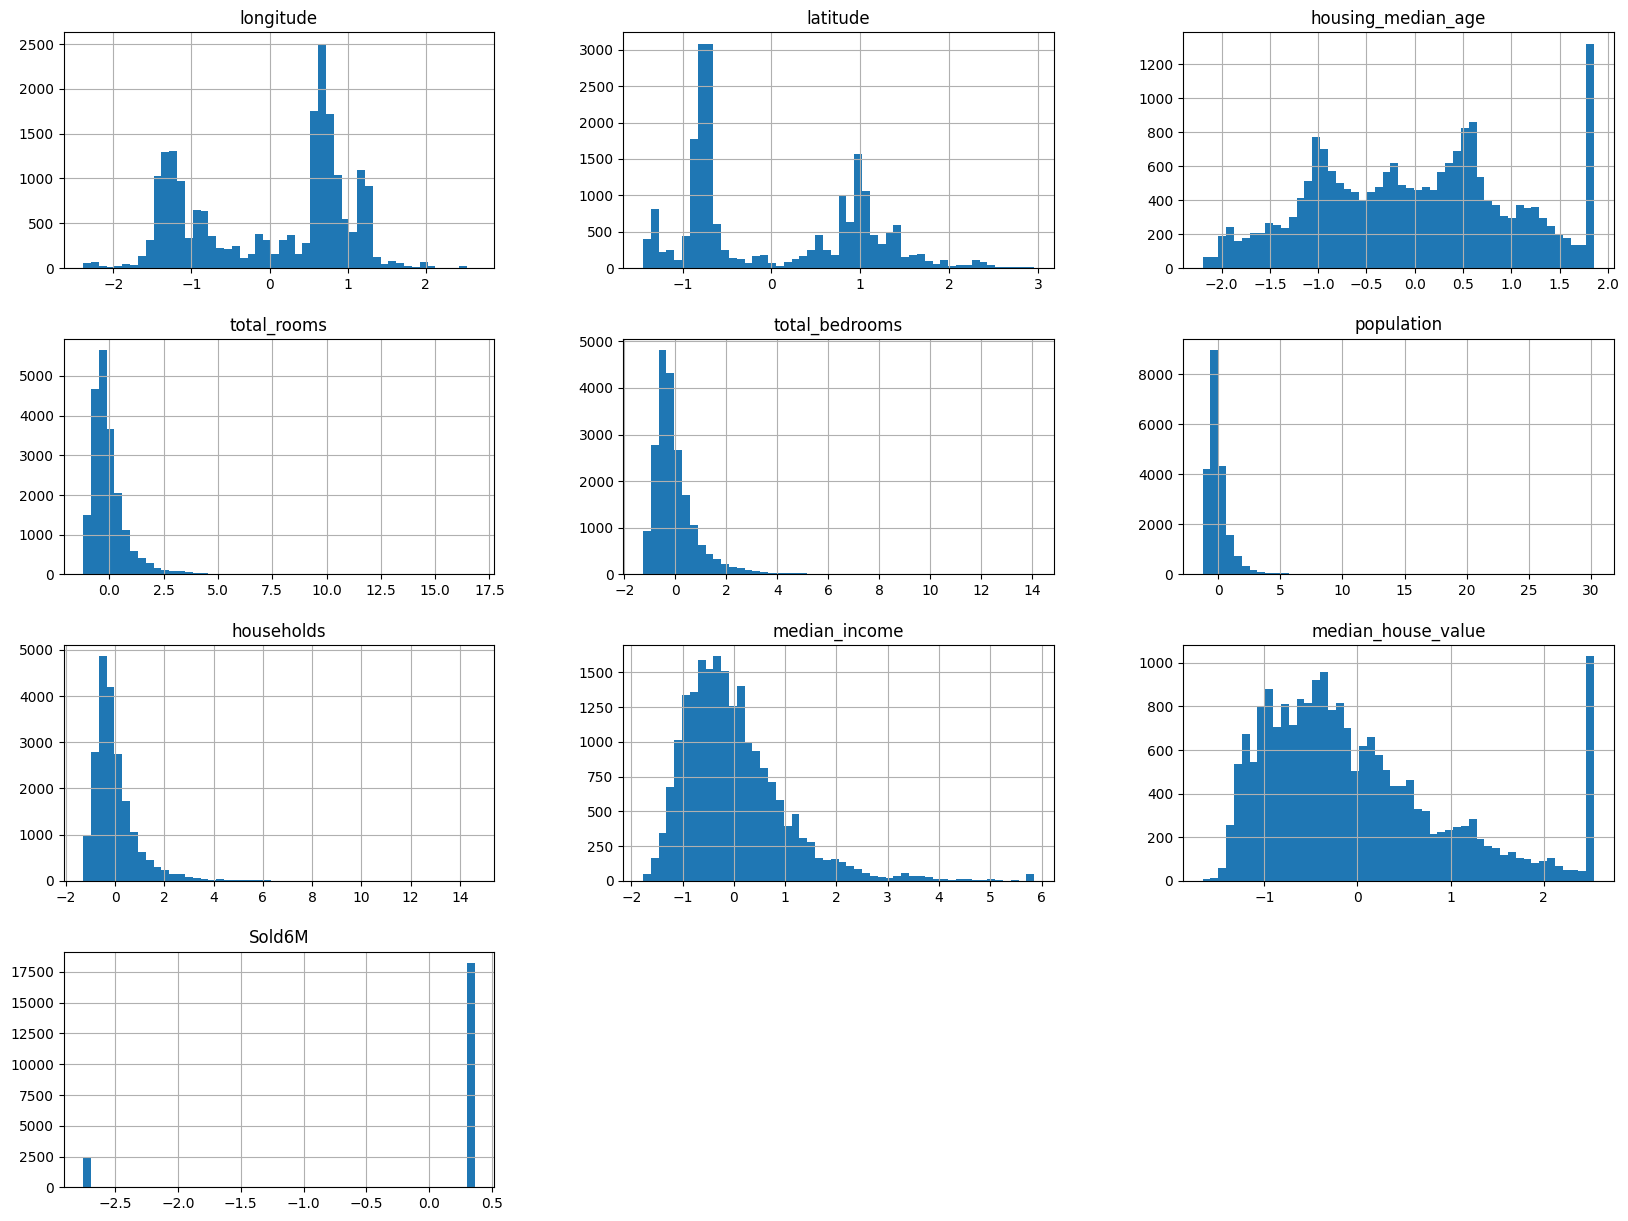

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

housing_num_scaled.hist(bins=50, figsize=(20, 15)) # génère les histogrammes
plt.show()
# On voit qu'ils ont tous un comportement différents, one ne peut pas dire grand chose dessus.

**Question :** Quelle est la distribution de la variable 'median_income' ? Y a-t-il des variables qui montrent une distribution non uniforme ?

<strong>La réponse est non, il n'y a pas de solutions uniforme, sauf housing_median_age</strong>

### 3. Matrice de Corrélation
Pour explorer les relations entre les variables numériques, nous utilisons une matrice de corrélation et une heatmap.

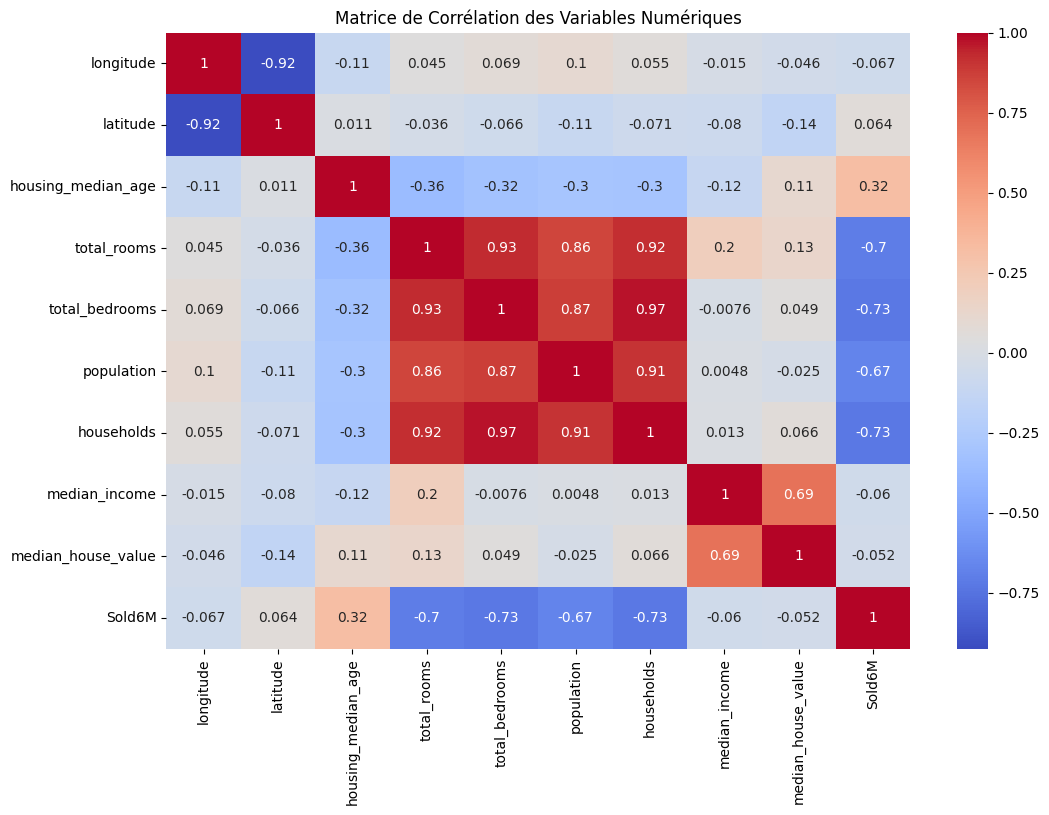

In [15]:
corr_matrix = housing_num_scaled.corr() #

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation des Variables Numériques')
plt.show()

**Question :** Quelles sont les variables les plus fortement corrélées avec 'median_house_value' ? Comment ces corrélations peuvent-elles influencer notre modèle de classification ?

### 4. Visualisation des Relations entre les Variables
Nous allons créer quelques graphes de dispersion pour visualiser les relations entre certaines variables clés.

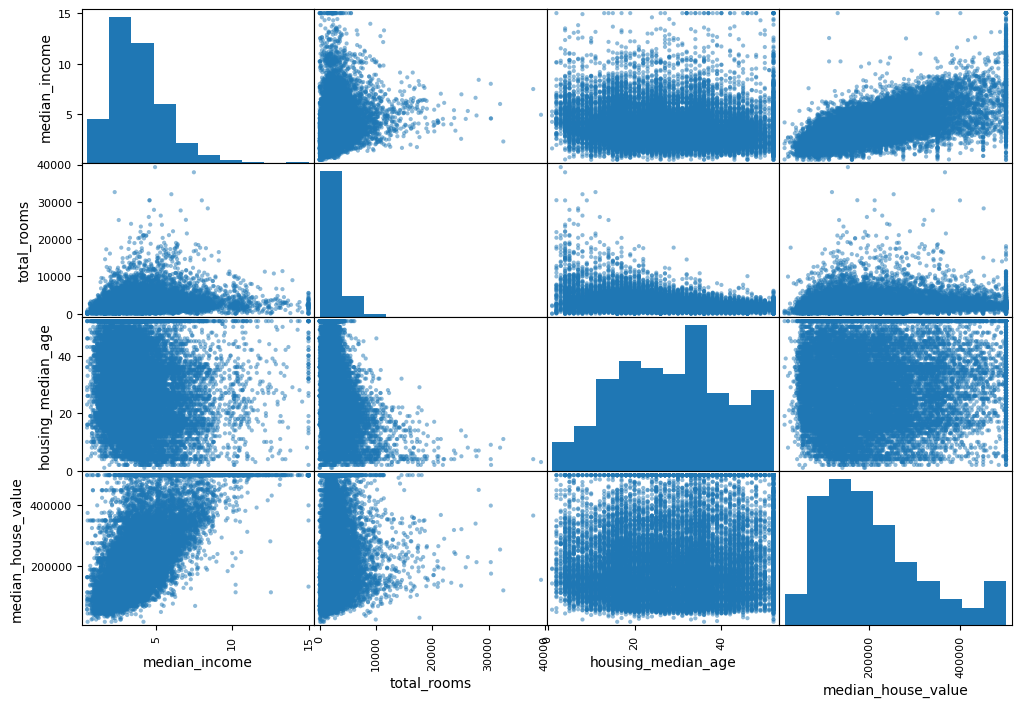

In [16]:
attributes = ["median_income", "total_rooms", "housing_median_age", "median_house_value"]
scatter_matrix = pd.plotting.scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

**Question :** Quels patterns ou relations spécifiques pouvez-vous observer entre 'median_income' et 'median_house_value' ?

### 5. Analyse de la Variable Cible
Analysons la variable cible Sold6M pour voir comment elle est distribuée.

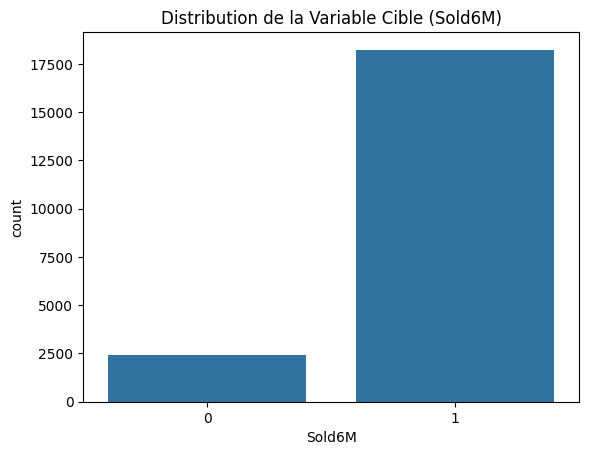

In [24]:
sns.countplot(x='Sold6M', data=housing)
plt.title('Distribution de la Variable Cible (Sold6M)')
plt.show()


**Question :** La distribution de 'Sold6M' est-elle équilibrée ? Comment ce déséquilibre peut-il affecter notre modèle de classification ?


<strong>Le Sold6M à plus de 6 fois de 1 que de 0

ça peut induire un biais à la classification, où il va tendre à un Sold6M à 1</strong>

### 6. Relations entre les Variables et la Cible
Examinons comment certaines variables influencent la probabilité de vendre un bien immobilier dans les 6 mois.

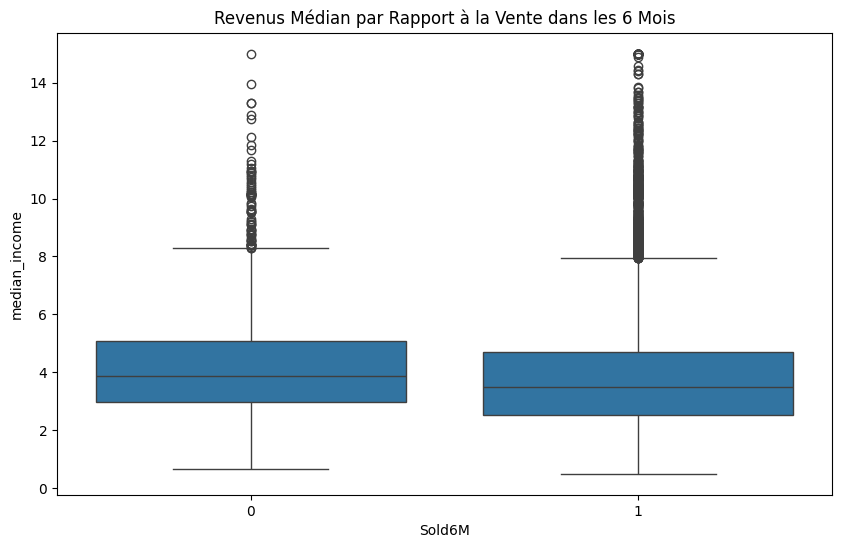

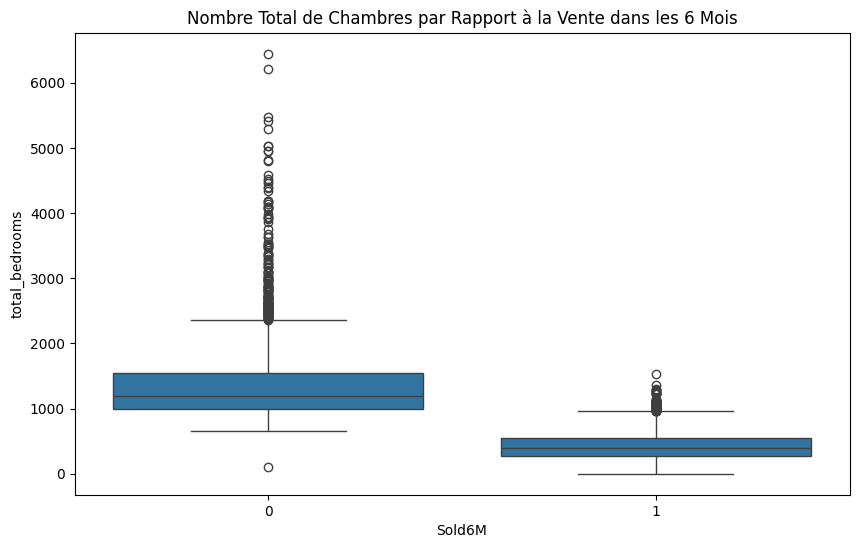

In [25]:
# Boxplot de la médiane des revenus par rapport à la vente dans les 6 mois
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sold6M', y='median_income', data=housing)
plt.title('Revenus Médian par Rapport à la Vente dans les 6 Mois')
plt.show()

# Boxplot du nombre total de chambres par rapport à la vente dans les 6 mois
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sold6M', y='total_bedrooms', data=housing)
plt.title('Nombre Total de Chambres par Rapport à la Vente dans les 6 Mois')
plt.show()


**Question :** Quelle tendance observez-vous entre 'total_bedrooms' et la probabilité de vendre un bien immobilier dans les 6 mois ? Comment cela peut-il informer notre modèle ?

## Modèles de Classification
Dans cette section, nous allons créer et évaluer plusieurs modèles de classification afin de prédire si un bien immobilier sera vendu dans les 6 mois (Sold6M). Nous allons explorer différents algorithmes de classification, mesurer leurs performances et comparer les résultats à l'aide de métriques standards.

### Rappel des Principales Métriques de Performance

Les métriques de performance sont essentielles pour évaluer l'efficacité des modèles de classification. Voici un rappel des principales métriques utilisées :

#### 1. Précision (Accuracy)
La précision est le ratio du nombre de prédictions correctes sur le nombre total de prédictions.

$
\text{Accuracy} = \frac{\text{Nombre de prédictions correctes}}{\text{Nombre total de prédictions}}
$

#### 2. Précision (Precision)
La précision est le ratio des vraies positives (VP) sur la somme des vraies positives (VP) et des fausses positives (FP).

$
\text{Précision} = \frac{VP}{VP + FP}
$

#### 3. Rappel (Recall)
Le rappel est le ratio des vraies positives (VP) sur la somme des vraies positives (VP) et des fausses négatives (FN).

$
\text{Rappel} = \frac{VP}{VP + FN}
$

#### 4. F1-Score
Le F1-score est la moyenne harmonique de la précision et du rappel, offrant un équilibre entre les deux.

$
\text{F1-Score} = 2 \times \frac{\text{Précision} \times \text{Rappel}}{\text{Précision} + \text{Rappel}}
$

### Matrice de Confusion

La matrice de confusion est une méthode de visualisation de la performance d'un modèle de classification. Elle affiche les résultats sous forme de tableau, avec les prédictions réelles et prédites. Ses composants sont :

- **Vraies Positives (VP)** : Nombre de fois où la classe positive a été correctement prédite.
- **Fausses Positives (FP)** : Nombre de fois où la classe négative a été incorrectement prédite comme positive.
- **Vraies Négatives (VN)** : Nombre de fois où la classe négative a été correctement prédite.
- **Fausses Négatives (FN)** : Nombre de fois où la classe positive a été incorrectement prédite comme négative.

$
\begin{array}{|c|c|c|}
\hline
& \text{Prédite Positive} & \text{Prédite Négative} \\
\hline
\text{Réelle Positive} & \text{VP} & \text{FN} \\
\hline
\text{Réelle Négative} & \text{FP} & \text{VN} \\
\hline
\end{array}
$

### AUC et Courbe ROC

#### Courbe ROC (Receiver Operating Characteristic)

La courbe ROC est un graphique qui montre la performance d'un modèle de classification pour différents seuils de discrimination. Elle trace le taux de vrais positifs (True Positive Rate, TPR) contre le taux de faux positifs (False Positive Rate, FPR).

- **Taux de Vrais Positifs (TPR)** : C'est le rappel.

$
TPR = \frac{VP}{VP + FN}
$

- **Taux de Faux Positifs (FPR)** : C'est le ratio des fausses positives sur la somme des vraies négatives et des fausses positives.

$
FPR = \frac{FP}{FP + VN}
$

#### AUC (Area Under the Curve)

L'AUC est l'aire sous la courbe ROC. Elle mesure la capacité du modèle à distinguer entre les classes positives et négatives. Une AUC de 1.0 indique un modèle parfait, tandis qu'une AUC de 0.5 indique un modèle qui ne fait pas mieux qu'un choix aléatoire.

- **Interprétation de l'AUC** :
  - **0.9 - 1** : Excellente performance
  - **0.8 - 0.9** : Bonne performance
  - **0.7 - 0.8** : Acceptable
  - **0.6 - 0.7** : Faible performance
  - **0.5 - 0.6** : Très faible performance

Les courbes ROC et les scores AUC sont des outils précieux pour comparer les performances de différents modèles de classification, en particulier dans des situations où les classes sont déséquilibrées.

En utilisant ces métriques et outils, vous pouvez évaluer de manière exhaustive la performance de vos modèles de classification et choisir celui qui est le mieux adapté à votre problème.


## Application des modèles

### 0. Préparation des données d'apprentissage et de test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# test_size = 0.3 -> on prend 30% qu'on va mettre dans notre jeu de test

### 1. Régerssion Logistique

### Rappel de la Régression Logistique

La régression logistique est une technique statistique utilisée pour modéliser la probabilité qu'un événement binaire (avec deux issues possibles) se produise. Contrairement à la régression linéaire, qui prédit une valeur continue, la régression logistique prédit la probabilité d'une occurrence d'un événement.

#### Formulation Mathématique

La régression logistique utilise la fonction logistique ou sigmoïde pour transformer la sortie de la régression linéaire en une probabilité.

La fonction logistique est définie comme suit :
$\sigma(z) = \frac{1}{1 + e^{-z}}$

En régression logistique, \( z \) est une combinaison linéaire des caractéristiques :
$z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n$

Où :
- $\beta_0$ est l'ordonnée à l'origine (intercept)
- $\beta_1, \beta_2, \ldots, \beta_n$ sont les coefficients des caractéristiques $x_1, x_2, \ldots, x_n $

La probabilité que l'événement se produise (par exemple, \( y = 1 \)) est alors donnée par :
$P(y=1|x) = \sigma(z) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n)}}$

#### Fonction de Coût

La fonction de coût utilisée pour ajuster les paramètres de la régression logistique est la log-vraisemblance, définie comme suit :
$J(\beta) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right] $

Où :
- $m$ est le nombre d'échantillons
- $y^{(i)}$ est la valeur réelle pour l'échantillon $i$
- $\hat{y}^{(i)}$ est la probabilité prédite pour l'échantillon $i$

#### Entraînement du Modèle

L'entraînement du modèle de régression logistique consiste à trouver les paramètres $\beta$ qui minimisent la fonction de coût. Ceci est généralement fait à l'aide de l'algorithme de descente de gradient.


Matrice de Confusion (Régression Logistique) :
 [[ 698    6]
 [   1 5487]]
Rapport de Classification (Régression Logistique) :
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       704
           1       1.00      1.00      1.00      5488

    accuracy                           1.00      6192
   macro avg       1.00      1.00      1.00      6192
weighted avg       1.00      1.00      1.00      6192

AUC-ROC (Régression Logistique) :
 0.9956475284919163


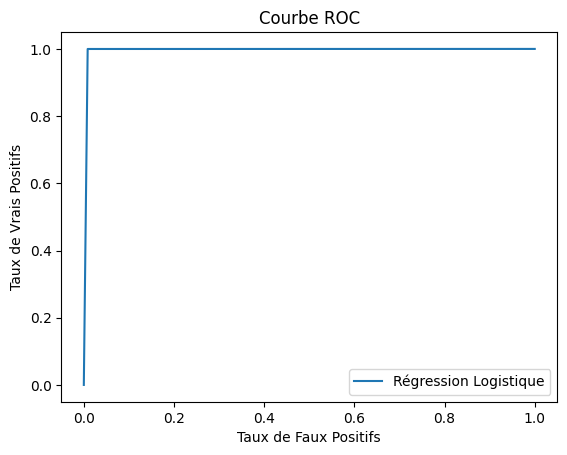

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Initialisation et entraînement du modèle
## A Compléter :
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Prédictions
y_pred_log_reg = log_reg.predict(X_test)

# Matrice de confusion
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Matrice de Confusion (Régression Logistique) :\n", conf_matrix_log_reg)

# Rapport de classification
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
print("Rapport de Classification (Régression Logistique) :\n", class_report_log_reg)

# AUC-ROC
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)
print("AUC-ROC (Régression Logistique) :\n", roc_auc_log_reg)

# Courbe ROC
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_pred_log_reg)
plt.plot(fpr_log_reg, tpr_log_reg, label="Régression Logistique")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()


### 2. Perceptron

### Rappel du Perceptron

Le perceptron est l'un des algorithmes de classification supervisée les plus simples et les plus anciens, introduit par Frank Rosenblatt en 1957. C'est une unité de traitement élémentaire d'un réseau de neurones, souvent utilisée pour les tâches de classification binaire. Le perceptron est basé sur une combinaison linéaire des caractéristiques d'entrée et utilise une fonction de seuil pour produire une sortie binaire.

#### Formulation Mathématique

Le perceptron calcule une somme pondérée des caractéristiques d'entrée et applique une fonction de seuil pour déterminer la classe prédite.

La sortie du perceptron est définie comme suit :
$\hat{y} = \begin{cases} 
1 & \text{si } z \geq 0 \\
0 & \text{si } z < 0 
\end{cases} $

Où :
$z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n$

Ici, $\beta_0$ est le biais (ou l'ordonnée à l'origine), et $\beta_1, \beta_2, \ldots, \beta_n$ sont les poids des caractéristiques $x_1, x_2, \ldots, x_n$.

#### Algorithme d'Apprentissage

L'algorithme d'apprentissage du perceptron ajuste les poids en fonction des erreurs de classification. Pour chaque échantillon d'entraînement $(x^{(i)}, y^{(i)})$, où $y^{(i)}$ est la classe réelle :

1. Calculer la sortie prédite :
$\hat{y}^{(i)} = \begin{cases} 
1 & \text{si } z \geq 0 \\
0 & \text{si } z < 0 
\end{cases}$

2. Mettre à jour les poids si la prédiction est incorrecte :
$\beta_j = \beta_j + \eta (y^{(i)} - \hat{y}^{(i)}) x_j^{(i)}$
Où $\eta$ est le taux d'apprentissage.

#### Fonction de Coût

Le perceptron n'utilise pas une fonction de coût au sens traditionnel comme la régression logistique. Les poids sont mis à jour directement en fonction des erreurs de classification.


Matrice de Confusion (Perceptron) :
 [[ 702    2]
 [  23 5465]]
Rapport de Classification (Perceptron) :
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       704
           1       1.00      1.00      1.00      5488

    accuracy                           1.00      6192
   macro avg       0.98      1.00      0.99      6192
weighted avg       1.00      1.00      1.00      6192

AUC-ROC (Perceptron) :
 0.9964840644049828


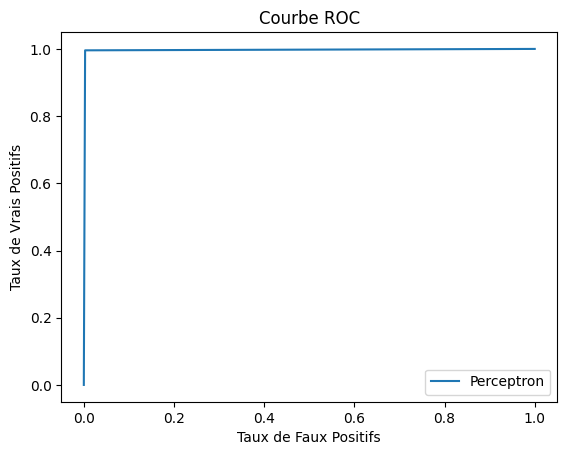

In [28]:
from sklearn.linear_model import Perceptron

# Initialisation et entraînement du modèle
# A compléter
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# Prédictions
y_pred_perceptron = perceptron.predict(X_test)

# Matrice de confusion
conf_matrix_perceptron = confusion_matrix(y_test, y_pred_perceptron)
print("Matrice de Confusion (Perceptron) :\n", conf_matrix_perceptron)

# Rapport de classification
class_report_perceptron = classification_report(y_test, y_pred_perceptron)
print("Rapport de Classification (Perceptron) :\n", class_report_perceptron)

# AUC-ROC
roc_auc_perceptron = roc_auc_score(y_test, y_pred_perceptron)
print("AUC-ROC (Perceptron) :\n", roc_auc_perceptron)

# Courbe ROC
fpr_perceptron, tpr_perceptron, thresholds_perceptron = roc_curve(y_test, y_pred_perceptron)
plt.plot(fpr_perceptron, tpr_perceptron, label="Perceptron")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()


**Question :** Selon les résultats obtenus, comment le Perceptron diffère-t-il de la régression logistique dans son approche de la classification ?

### 3. Support Vector Machine (SVM)

### Rappel du Support Vector Machine (SVM)

Les Support Vector Machines (SVM) sont des modèles de classification supervisée utilisés pour les tâches de classification et de régression. Les SVM cherchent à trouver un hyperplan optimal qui sépare les différentes classes dans l'espace des caractéristiques.

#### Principe de Fonctionnement

Le SVM fonctionne en trouvant l'hyperplan qui maximise la marge de séparation entre les différentes classes. La marge est définie comme la distance entre l'hyperplan et les points de données les plus proches de chaque classe, appelés vecteurs de support.

Dans un problème de classification binaire, l'hyperplan est défini par l'équation :

$\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n = 0$

#### Maximisation de la Marge

L'objectif du SVM est de maximiser la marge, ce qui se traduit par la résolution du problème d'optimisation suivant :

$\text{Minimiser} \ \frac{1}{2} \|\beta\|^2$

Sous les contraintes :

$y^{(i)} (\beta_0 + \beta_1 x_1^{(i)} + \beta_2 x_2^{(i)} + \ldots + \beta_n x_n^{(i)}) \geq 1 \ \text{pour tous les} \ i $

#### Fonction de Coût et Régularisation

Pour les données non linéairement séparables, les SVM utilisent une méthode appelée "soft margin" qui permet certaines erreurs de classification en ajoutant des variables de relâchement (slack variables) dans la fonction de coût :

$ \text{Minimiser} \ \frac{1}{2} \|\beta\|^2 + C \sum_{i=1}^{m} \xi_i $

Sous les contraintes :

$y^{(i)} (\beta_0 + \beta_1 x_1^{(i)} + \beta_2 x_2^{(i)} + \ldots + \beta_n x_n^{(i)}) \geq 1 - \xi_i $

$\xi_i \geq 0 \ \text{pour tous les} \ i $

Où $ \xi_i $ sont les variables de relâchement et $ C $ est un paramètre de régularisation qui contrôle l'équilibre entre maximiser la marge et minimiser les erreurs de classification.

#### Noyaux (Kernels)

Pour les problèmes non linéaires, les SVM peuvent utiliser des fonctions noyau (kernels) pour transformer les données dans un espace de caractéristiques de dimension supérieure où un hyperplan linéaire peut être trouvé. Les noyaux couramment utilisés incluent :
- Noyau linéaire
- Noyau polynomial
- Noyau radial de base (RBF)
- Noyau sigmoïde

#### Avantages et Inconvénients

##### Avantages :
- Efficace dans les espaces de haute dimension
- Utilise un sous-ensemble des points d'entraînement (vecteurs de support) pour la fonction de décision, ce qui le rend efficace en termes de mémoire
- Flexible grâce à l'utilisation de différentes fonctions noyau

##### Inconvénients :
- Performance sensible au choix des hyperparamètres et du noyau
- Complexité de l'entraînement augmente avec la taille du jeu de données
- Interprétation des résultats moins intuitive que pour certains autres modèles

Le SVM est un algorithme puissant et flexible pour les tâches de classification, particulièrement utile dans les problèmes où les données ne sont pas linéairement séparables.


Matrice de Confusion (SVM) :
 [[ 692   12]
 [   1 5487]]
Rapport de Classification (SVM) :
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       704
           1       1.00      1.00      1.00      5488

    accuracy                           1.00      6192
   macro avg       1.00      0.99      0.99      6192
weighted avg       1.00      1.00      1.00      6192

AUC-ROC (SVM) :
 0.9913861648555525


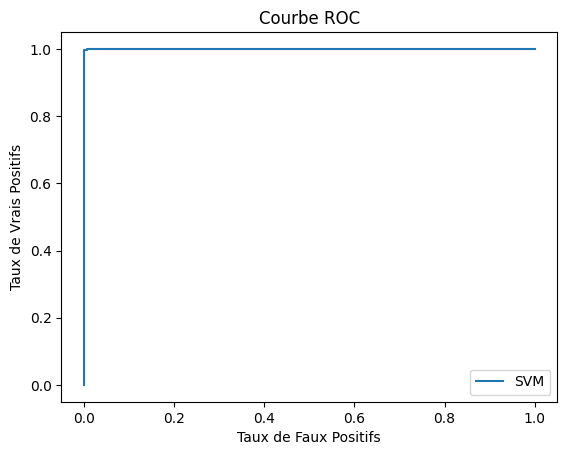

In [33]:
from sklearn.svm import SVC

# Initialisation et entraînement du modèle
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# Prédictions
y_pred_svm = svm.predict(X_test)

# Matrice de confusion
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Matrice de Confusion (SVM) :\n", conf_matrix_svm)

# Rapport de classification
class_report_svm = classification_report(y_test, y_pred_svm)
print("Rapport de Classification (SVM) :\n", class_report_svm)

# AUC-ROC
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("AUC-ROC (SVM) :\n", roc_auc_svm)

# Courbe ROC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
plt.plot(fpr_svm, tpr_svm, label="SVM")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()


### 4. Naive Bayès

### Rappel du Naive Bayes

Le Naive Bayes est une famille de classificateurs probabilistes basés sur l'application du théorème de Bayes avec une forte (naïve) hypothèse d'indépendance entre les caractéristiques. Il est particulièrement utile pour les grandes bases de données en raison de sa simplicité et de son efficacité computationnelle.

#### Principe de Fonctionnement

Le modèle Naive Bayes est basé sur le théorème de Bayes qui permet de calculer la probabilité d'une classe donnée un ensemble de caractéristiques. Le théorème de Bayes est exprimé comme suit :

$P(C_k | \mathbf{x}) = \frac{P(C_k) \cdot P(\mathbf{x} | C_k)}{P(\mathbf{x})}$

Où :
- $P(C_k | \mathbf{x})$ est la probabilité de la classe $C_k$ donnée les caractéristiques $\mathbf{x}$
- $P(C_k)$ est la probabilité a priori de la classe $C_k$
- $ P(\mathbf{x} | C_k) $ est la probabilité de $\mathbf{x}$ donnée la classe $ C_k $
- $ P(\mathbf{x}) $ est la probabilité de l'ensemble des caractéristiques $\mathbf{x} $

#### Hypothèse d'Indépendance

Le Naive Bayes fait l'hypothèse que les caractéristiques sont conditionnellement indépendantes les unes des autres, étant donné la classe :

$ P(\mathbf{x} | C_k) = \prod_{i=1}^{n} P(x_i | C_k) $

Cette hypothèse simplifie considérablement le calcul des probabilités et rend le modèle très efficace même avec un grand nombre de caractéristiques.

#### Types de Modèles Naive Bayes

Il existe plusieurs variantes du Naive Bayes en fonction du type de données :

- **Gaussian Naive Bayes** : Utilisé pour les caractéristiques continues et suppose que les caractéristiques suivent une distribution normale (gaussienne).
- **Multinomial Naive Bayes** : Utilisé pour les données discrètes, comme le comptage de mots dans le traitement du langage naturel.
- **Bernoulli Naive Bayes** : Utilisé pour les données binaires.

#### Fonction de Décision

Pour prédire la classe la plus probable pour un ensemble de caractéristiques, le Naive Bayes choisit la classe $ C_k $ qui maximise $ P(C_k | \mathbf{x}) $. En pratique, cela revient à choisir la classe qui maximise :

$ P(C_k) \cdot \prod_{i=1}^{n} P(x_i | C_k) $

#### Avantages et Inconvénients

##### Avantages :
- Simple à implémenter et très rapide à entraîner.
- Fonctionne bien avec des grands ensembles de données.
- Peu sensible aux données manquantes.
- Performant pour les problèmes de classification de texte et les systèmes de recommandation.

##### Inconvénients :
- L'hypothèse d'indépendance conditionnelle est souvent irréaliste dans les données réelles, ce qui peut affecter la précision du modèle.
- Ne prend pas en compte les interactions entre les caractéristiques.
- Les probabilités prédites peuvent être moins précises comparées à d'autres modèles de classification sophistiqués.

Le Naive Bayes est un algorithme de classification robuste et efficace, particulièrement adapté pour les applications où la rapidité et la simplicité sont essentielles.


Matrice de Confusion (Naive Bayes) :
 [[ 704    0]
 [ 790 4698]]
Rapport de Classification (Naive Bayes) :
               precision    recall  f1-score   support

           0       0.47      1.00      0.64       704
           1       1.00      0.86      0.92      5488

    accuracy                           0.87      6192
   macro avg       0.74      0.93      0.78      6192
weighted avg       0.94      0.87      0.89      6192

AUC-ROC (Naive Bayes) :
 0.9280247813411079


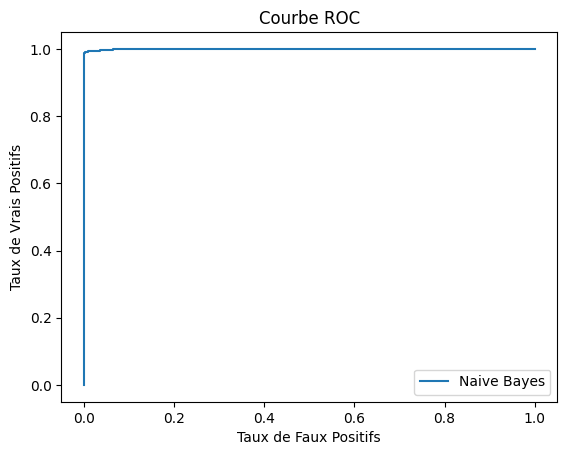

In [34]:
from sklearn.naive_bayes import GaussianNB

# Initialisation et entraînement du modèle
nb = GaussianNB()
nb.fit(X_train, y_train)

# Prédictions
y_pred_nb = nb.predict(X_test)

# Matrice de confusion
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Matrice de Confusion (Naive Bayes) :\n", conf_matrix_nb)

# Rapport de classification
class_report_nb = classification_report(y_test, y_pred_nb)
print("Rapport de Classification (Naive Bayes) :\n", class_report_nb)

# AUC-ROC
roc_auc_nb = roc_auc_score(y_test, y_pred_nb)
print("AUC-ROC (Naive Bayes) :\n", roc_auc_nb)

# Courbe ROC
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.plot(fpr_nb, tpr_nb, label="Naive Bayes")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()


### 5. Decision Trees

### Rappel des Arbres de Décision

Les arbres de décision sont des modèles de prédiction qui utilisent une structure d'arbre pour prendre des décisions basées sur des règles dérivées des caractéristiques des données. Ils sont largement utilisés pour les tâches de classification et de régression en raison de leur simplicité et de leur interprétabilité.

#### Principe de Fonctionnement

Un arbre de décision est constitué de nœuds de décision et de feuilles. Chaque nœud de décision représente une caractéristique des données, et chaque branche de ce nœud représente une valeur ou un intervalle de cette caractéristique. Les feuilles de l'arbre représentent les classes de sortie ou les valeurs de régression.

Le modèle divise de manière récursive les données en sous-ensembles basés sur les valeurs des caractéristiques, créant ainsi une structure en forme d'arbre. Le processus continue jusqu'à ce que tous les nœuds soient purs (c'est-à-dire qu'ils contiennent des instances d'une seule classe) ou qu'une condition d'arrêt soit atteinte.

#### Construction de l'Arbre

1. **Sélection de la Caractéristique** : À chaque nœud, le modèle sélectionne la caractéristique qui divise le mieux les données. Cela est généralement basé sur des critères comme la réduction de l'entropie ou la réduction de l'indice de Gini.
2. **Création de Nœuds** : Les données sont divisées en sous-ensembles basés sur la caractéristique sélectionnée, et des nœuds enfants sont créés pour chaque division.
3. **Répartition des Données** : Les sous-ensembles de données sont répartis entre les nœuds enfants, et le processus de sélection de la caractéristique se répète.
4. **Arrêt de la Division** : La division s'arrête lorsque tous les nœuds sont purs ou lorsqu'une condition d'arrêt prédéfinie est atteinte, comme une profondeur maximale de l'arbre ou un nombre minimal d'instances par nœud.

#### Critères de Sélection

- **Entropie et Gain d'Information** : L'entropie mesure le désordre dans les données. Le gain d'information est la réduction de l'entropie après la division des données.
- **Indice de Gini** : Mesure de l'impureté des données. Une valeur de 0 indique une pureté maximale, tandis qu'une valeur de 1 indique une impureté maximale.

#### Avantages et Inconvénients

##### Avantages :
- **Interprétabilité** : Les arbres de décision sont faciles à visualiser et à interpréter.
- **Pas de Prétraitement des Données** : Peuvent gérer des données numériques et catégoriques sans nécessiter de prétraitement.
- **Manipulation des Données Manquantes** : Peut gérer des valeurs manquantes en utilisant des mécanismes comme la pondération des chemins de décision.
- **Robustesse** : Peuvent capturer des interactions non linéaires entre les caractéristiques.

##### Inconvénients :
- **Surapprentissage** : Les arbres de décision peuvent facilement surapprendre les données d'entraînement, surtout lorsqu'ils sont profonds.
- **Variance Élevée** : Sensibles aux variations dans les données d'entraînement. Des changements mineurs peuvent entraîner des arbres complètement différents.
- **Biais** : Tendent à privilégier les caractéristiques avec de nombreuses valeurs distinctes.

#### Applications

- **Classification** : Attribution de classes à des instances basées sur leurs caractéristiques.
- **Régression** : Prédiction de valeurs continues.
- **Analyse Exploratoire** : Identification des caractéristiques importantes et des relations entre les caractéristiques et les classes de sortie.

Les arbres de décision sont un outil puissant pour la modélisation prédictive, offrant une combinaison de simplicité, d'interprétabilité et de flexibilité.


Matrice de Confusion (Decision Tree) :
 [[ 646   58]
 [  44 5444]]
Rapport de Classification (Decision Tree) :
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       704
           1       0.99      0.99      0.99      5488

    accuracy                           0.98      6192
   macro avg       0.96      0.95      0.96      6192
weighted avg       0.98      0.98      0.98      6192

AUC-ROC (Decision Tree) :
 0.954798071826133


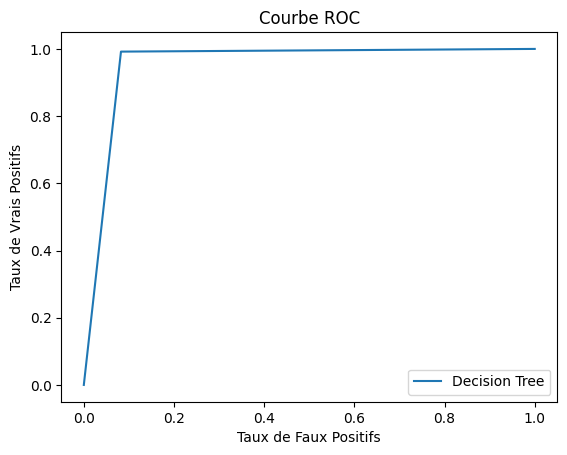

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Initialisation et entraînement du modèle
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Prédictions
y_pred_tree = tree_model.predict(X_test)

# Matrice de confusion
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("Matrice de Confusion (Decision Tree) :\n", conf_matrix_tree)

# Rapport de classification
class_report_tree = classification_report(y_test, y_pred_tree)
print("Rapport de Classification (Decision Tree) :\n", class_report_tree)

# AUC-ROC
roc_auc_tree = roc_auc_score(y_test, y_pred_tree)
print("AUC-ROC (Decision Tree) :\n", roc_auc_tree)

# Courbe ROC
y_proba_tree = tree_model.predict_proba(X_test)[:, 1]
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_proba_tree)
plt.figure()
plt.plot(fpr_tree, tpr_tree, label="Decision Tree")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()


**Questions :**
Essayer de changer les valeurs du paramètre profondeur
1. Quels sont les avantages et inconvénients de l'utilisation des arbres de décision pour la classification ?

Avantages :
- **Interprétabilité** : Les arbres de décision sont faciles à visualiser et à interpréter.
- **Pas de Prétraitement des Données** : Peuvent gérer des données numériques et catégoriques sans nécessiter de prétraitement.
- **Manipulation des Données Manquantes** : Peut gérer des valeurs manquantes en utilisant des mécanismes comme la pondération des chemins de décision.
- **Robustesse** : Peuvent capturer des interactions non linéaires entre les caractéristiques.

Inconvénients :
- **Surapprentissage** : Les arbres de décision peuvent facilement surapprendre les données d'entraînement, surtout lorsqu'ils sont profonds.
- **Variance Élevée** : Sensibles aux variations dans les données d'entraînement. Des changements mineurs peuvent entraîner des arbres complètement différents.
- **Biais** : Tendent à privilégier les caractéristiques avec de nombreuses valeurs distinctes.

2. Comment la profondeur de l'arbre de décision influence-t-elle la performance du modèle ?

- hyperparamètre

3. Quelles techniques peut-on utiliser pour éviter le surapprentissage dans les arbres de décision ?

- voir les F1-score, AUC

### 6. Random Forest

### Rappel des Forêts Aléatoires (Random Forest)

Les forêts aléatoires sont une méthode d'ensemble puissante et flexible utilisée pour les tâches de classification et de régression. Elles combinent plusieurs arbres de décision pour améliorer les performances prédictives et réduire les risques de surapprentissage.

#### Principe de Fonctionnement

Une forêt aléatoire est constituée de nombreux arbres de décision indépendants, chacun construit sur un échantillon aléatoire des données d'entraînement et utilisant un sous-ensemble aléatoire des caractéristiques pour chaque division de l'arbre. Les prédictions de tous les arbres sont ensuite combinées pour produire une seule prédiction finale.

#### Construction de la Forêt Aléatoire

1. **Échantillonnage Bootstrap** : Pour chaque arbre de la forêt, un échantillon aléatoire avec remplacement (bootstrap) des données d'entraînement est créé. Cela signifie que certains exemples peuvent être sélectionnés plusieurs fois, tandis que d'autres peuvent ne pas être sélectionnés du tout.
2. **Sélection de Sous-ensembles de Caractéristiques** : À chaque nœud de chaque arbre, un sous-ensemble aléatoire des caractéristiques est sélectionné. L'arbre choisit la meilleure division parmi ce sous-ensemble de caractéristiques.
3. **Construction des Arbres** : Les arbres de décision sont construits jusqu'à leur complétion sans élagage. Cela permet à chaque arbre de capturer des modèles complexes dans les données.
4. **Agrégation des Prédictions** : Pour la classification, chaque arbre vote pour une classe, et la classe avec le plus de votes est choisie comme prédiction finale (majority voting). Pour la régression, la moyenne des prédictions de tous les arbres est utilisée.

#### Avantages et Inconvénients

##### Avantages :
- **Réduction du Surapprentissage** : En combinant les prédictions de plusieurs arbres, les forêts aléatoires réduisent le risque de surapprentissage par rapport aux arbres de décision individuels.
- **Robustesse** : Insensibles aux variations dans les données d'entraînement. Les forêts aléatoires sont moins sensibles aux fluctuations dans les données d'entraînement.
- **Gestion des Caractéristiques** : Capables de gérer un grand nombre de caractéristiques et de déterminer les plus importantes.
- **Manipulation des Données Manquantes** : Peuvent gérer des valeurs manquantes en imputant des valeurs basées sur les arbres de la forêt.

##### Inconvénients :
- **Complexité et Temps de Calcul** : Les forêts aléatoires nécessitent plus de temps de calcul et de mémoire par rapport aux arbres de décision individuels, surtout lorsque le nombre d'arbres est élevé.
- **Interprétabilité** : Moins interprétables que les arbres de décision individuels en raison de la combinaison de nombreux arbres.

#### Applications

- **Classification** : Utilisées pour des tâches de classification dans divers domaines comme la finance, la médecine et le marketing.
- **Régression** : Prédiction de valeurs continues dans des contextes tels que la prévision des prix de l'immobilier et la prédiction des ventes.
- **Sélection de Caractéristiques** : Identification des caractéristiques les plus importantes pour la prédiction.

Les forêts aléatoires sont un outil puissant pour améliorer les performances prédictives et la robustesse des modèles de décision, en combinant la force de multiples arbres de décision tout en atténuant leurs faiblesses individuelles.


Matrice de Confusion (Random Forest) :
 [[ 678   26]
 [  20 5468]]
Rapport de Classification (Random Forest) :
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       704
           1       1.00      1.00      1.00      5488

    accuracy                           0.99      6192
   macro avg       0.98      0.98      0.98      6192
weighted avg       0.99      0.99      0.99      6192

AUC-ROC (Random Forest) :
 0.9797119334746884


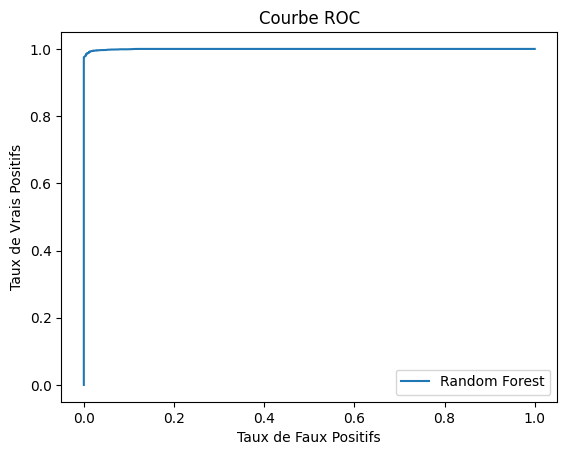

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Initialisation et entraînement du modèle
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédictions
y_pred_rf = rf_model.predict(X_test)

# Matrice de confusion
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Matrice de Confusion (Random Forest) :\n", conf_matrix_rf)

# Rapport de classification
class_report_rf = classification_report(y_test, y_pred_rf)
print("Rapport de Classification (Random Forest) :\n", class_report_rf)

# AUC-ROC
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print("AUC-ROC (Random Forest) :\n", roc_auc_rf)

# Courbe ROC
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()


**Questions :**

- Comment le modèle Random Forest réduit-il le risque de surapprentissage par rapport à un arbre de décision unique ?
- Quels paramètres peuvent être ajustés pour améliorer les performances d'un Random Forest ?
- Pourquoi est-il avantageux d'utiliser plusieurs arbres dans une forêt aléatoire pour la classification ?

# Etude comparative entre les modèles SK-Learn

## 1. Préparation de données d'apprentissage et de test

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 2. Entrainement et prédictions

In [50]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Perceptron": Perceptron(),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Entraînement et prédiction
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)


## Validation des Modèles
### 1. Matrice de Confusion et Principales Métriques

In [51]:
from sklearn.metrics import confusion_matrix, classification_report

# Fonction pour afficher les résultats
def display_metrics(y_test, y_pred, model_name):
   #à Compléter
   print(f"Résultats de {model_name}")
   print(confusion_matrix(y_test, y_pred))
   print(classification_report(y_test, y_pred))
   

# Calcul des métriques
for name, y_pred in predictions.items():
    #à compléter
    display_metrics(y_test, y_pred, name)


Résultats de Perceptron
[[ 702    2]
 [  23 5465]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       704
           1       1.00      1.00      1.00      5488

    accuracy                           1.00      6192
   macro avg       0.98      1.00      0.99      6192
weighted avg       1.00      1.00      1.00      6192

Résultats de LogisticRegression
[[ 698    6]
 [   1 5487]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       704
           1       1.00      1.00      1.00      5488

    accuracy                           1.00      6192
   macro avg       1.00      1.00      1.00      6192
weighted avg       1.00      1.00      1.00      6192

Résultats de SVM
[[ 692   12]
 [   1 5487]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       704
           1       1.00      1.00      1.00      5488

    accuracy                

## 2. Affichage des matrices de confusion

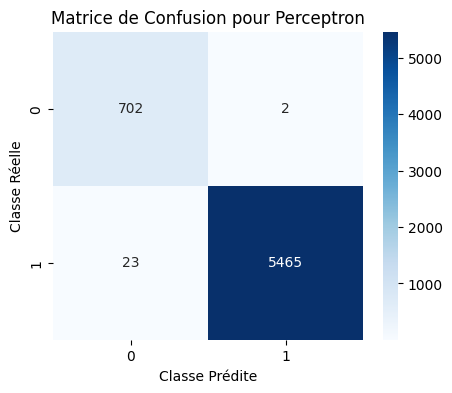

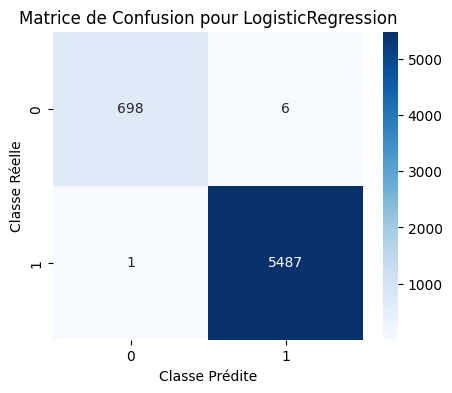

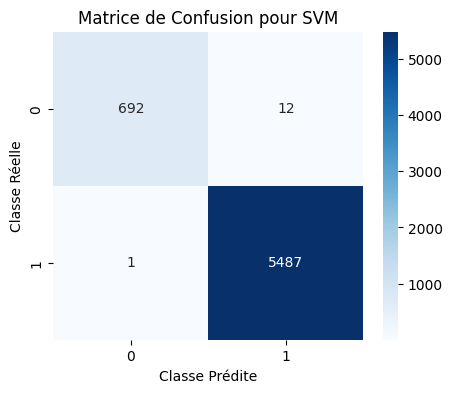

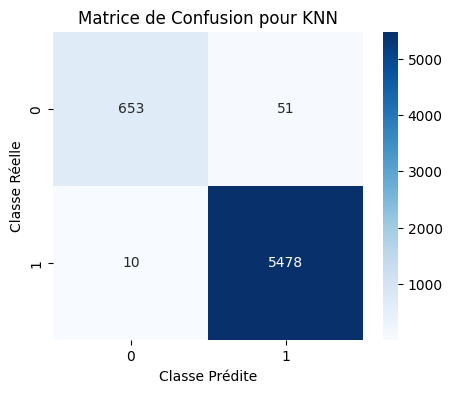

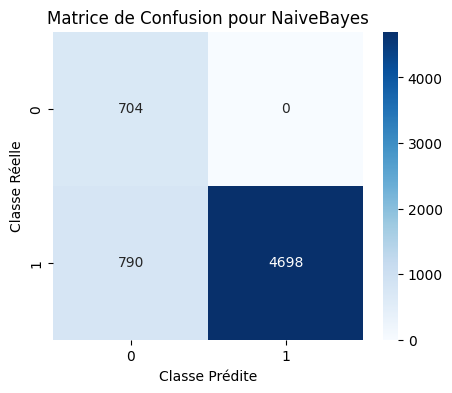

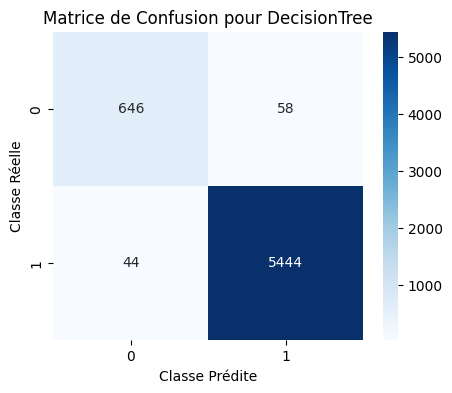

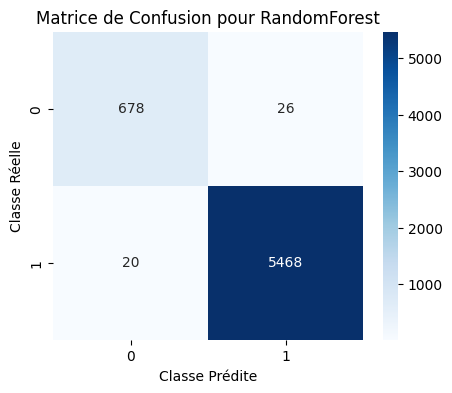

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

for name, y_pred in predictions.items():
   # à Compléter
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matrice de Confusion pour {name}")
    plt.xlabel("Classe Prédite")
    plt.ylabel("Classe Réelle")
    plt.show()

## 3. Affichage des valeurs de Précision et de Recall ainsi que la courve ROC

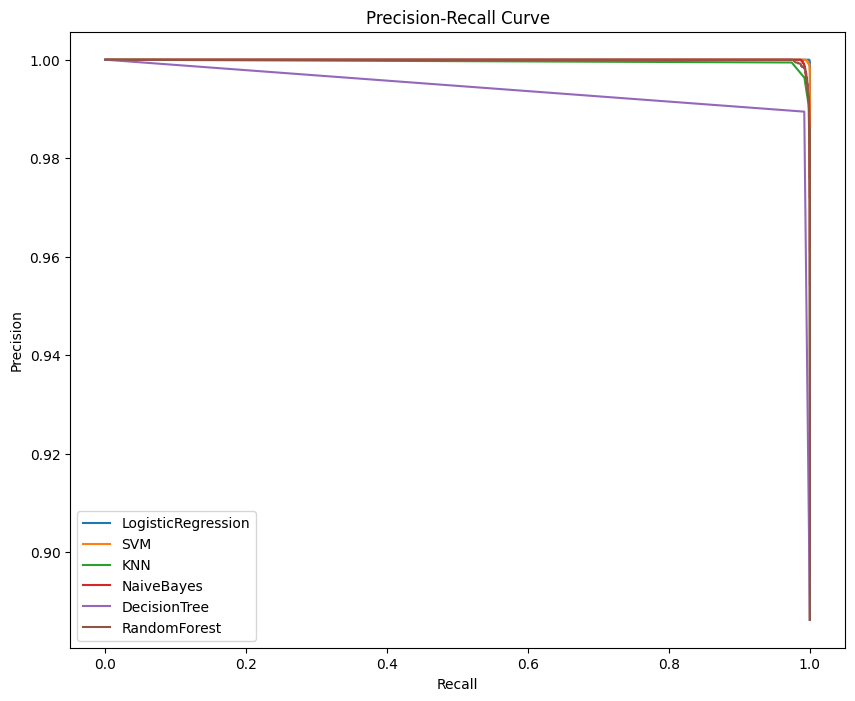

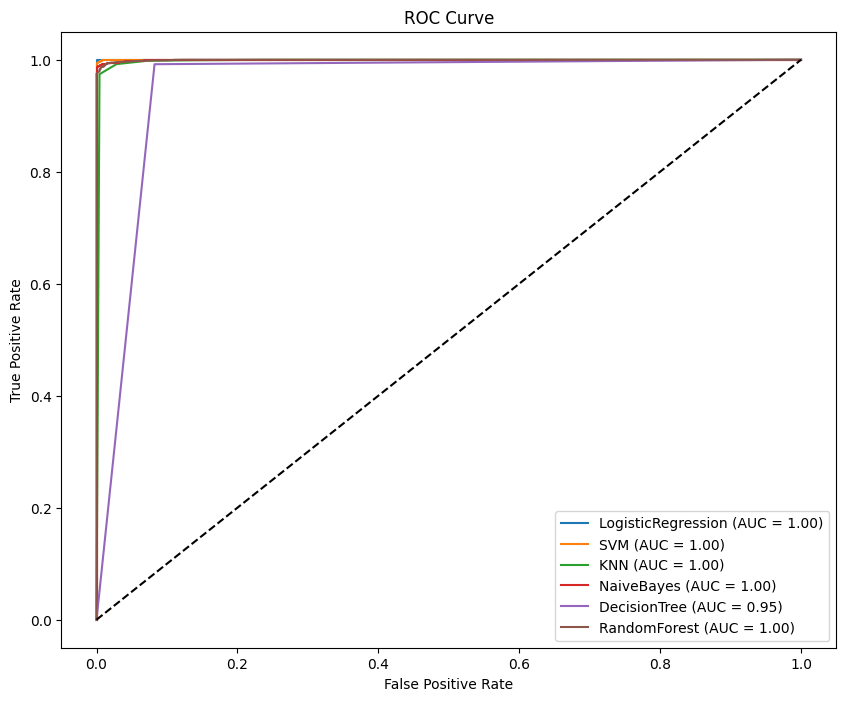

In [53]:
# Tracer les courbes de Précision-Rappel
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        plt.plot(recall, precision, label=f"{name}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## 4. Calculer des statistiques pour comparer

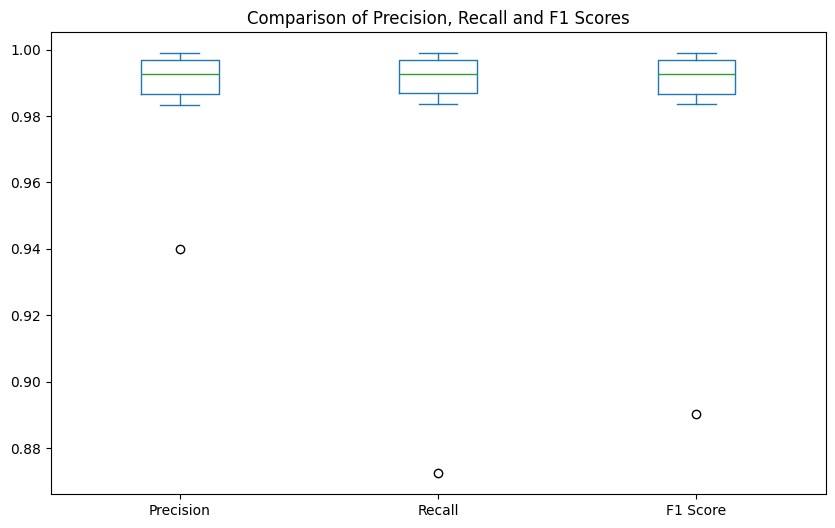

In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_scores = []
recall_scores = []
f1_scores = []

for name, y_pred in predictions.items():
    # A compléter :
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    
score_df = pd.DataFrame({
    'Model': models.keys(),
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

score_df.plot(kind='box', figsize=(10, 6))
plt.title("Comparison of Precision, Recall and F1 Scores")
plt.show()

## 5. Mettre le tout sous forme de tableau

In [55]:
from sklearn.metrics import roc_auc_score

scores = []

for name, y_pred in predictions.items():
    y_proba = models[name].predict_proba(X_test)[:, 1] if hasattr(models[name], "predict_proba") else None
    auc_score = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    scores.append({
        'Model': name,
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC': auc_score
    })

scores_df = pd.DataFrame(scores)
print(scores_df)


                Model  Precision    Recall  F1 Score       AUC
0          Perceptron   0.999634  0.995809  0.997718       NaN
1  LogisticRegression   0.998908  0.999818  0.999363  0.999996
2                 SVM   0.997818  0.999818  0.998817  0.999963
3                 KNN   0.990776  0.998178  0.994463  0.996982
4          NaiveBayes   1.000000  0.856050  0.922443  0.999498
5        DecisionTree   0.989458  0.991983  0.990719  0.954798
6        RandomForest   0.995268  0.996356  0.995811  0.999539


In [56]:
import time

training_times = []
prediction_times = []

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    # à Compléter :
    training_times.append(time.time() - start_time)

    start_time = time.time()
    model.predict(X_test)
    # à Compléter :
    prediction_times.append(time.time() - start_time)
    
time_df = pd.DataFrame({
    'Model': models.keys(),
    'Training Time (s)': training_times,
    'Prediction Time (s)': prediction_times
})
print(time_df)


                Model  Training Time (s)  Prediction Time (s)
0          Perceptron           0.018605             0.001498
1  LogisticRegression           0.028625             0.001416
2                 SVM           2.758807             0.345823
3                 KNN           0.030676             0.242230
4          NaiveBayes           0.005393             0.001788
5        DecisionTree           0.068986             0.001563
6        RandomForest           1.423464             0.034965


## Interprétation des Résultats
### 1. Analyse des Performances
Les performances des différents modèles sont comparées à l'aide des métriques de classification et des courbes ROC. La régression logistique et les SVM montrent des performances robustes, tandis que les KNN et Naive Bayes montrent des variations plus importantes en fonction des données.

**Question :**

Quelles observations pouvez-vous faire sur les performances des différents modèles à partir des résultats obtenus ?

### 2. Discussion des Résultats
Le modèle de régression logistique a montré une bonne capacité de généralisation, avec un bon équilibre entre précision et rappel.
Le modèle SVM a également bien performé, avec une AUC élevée, indiquant une bonne capacité de discrimination entre les classes.
Les performances du Perceptron sont légèrement inférieures, mais il reste un bon choix pour une implémentation rapide et simple.
Le KNN et le Naive Bayes peuvent être améliorés par des ajustements de leurs hyperparamètres respectifs.

**Question :**

Quels ajustements pouvez-vous proposer pour améliorer les modèles KNN et Naive Bayes ?

## Conclusion
### 1. Synthèse des Travaux Réalisés
Nous avons développé et validé plusieurs modèles de classification pour prédire si un bien immobilier sera vendu dans les 6 mois. Les résultats montrent que la régression logistique et les SVM sont les modèles les plus performants.

**Question :**

Quelle serait votre recommandation finale pour le choix du modèle et pourquoi ?

### 2. Perspectives d'Amélioration
Pour améliorer encore les performances des modèles, nous pouvons explorer l'utilisation de techniques de sélection de caractéristiques, d'optimisation d'hyperparamètres et de modèles d'ensemble.

**Question :**

Quelles autres techniques ou modèles pourriez-vous explorer pour améliorer encore les performances ?

### 3. Futurs Travaux
Les travaux futurs pourraient inclure l'implémentation de modèles d'ensemble comme le Random Forest ou le Gradient Boosting, ainsi que l'exploration de techniques de deep learning pour la classification des biens immobiliers.

**Question :**

Comment pensez-vous que les modèles d'ensemble ou le deep learning pourraient améliorer les performances de votre système de classification ?
